# Importing the necessary Libraries

In [263]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import pandas as panda
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [264]:
# Initialize hyper parameters
input_size = 1 # X-Value
output_size = 1 # Y-Value
hidden_size = 4

sequence_length = 1 

num_layers = 2
learning_rate = 0.01
batch_size = 32
num_epochs = 100

# Generating the Sine Dataset

In [265]:
# using linspace I was able to generate about 998 numbers in between 0 and 2pi.
xValues = np.linspace(0, 2 * math.pi, 1000)
# taking the generated x-values I then ran them through the sine function to get a y-value
yValues = np.sin(xValues)

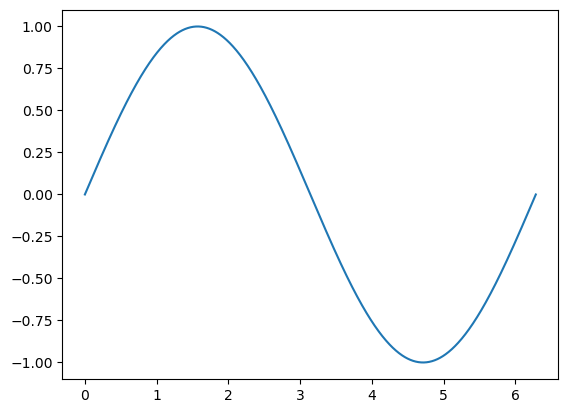

In [266]:
# plots the sine wave
plt.plot(xValues,yValues)

Now the Data set will be split into train (80%), validation (10%), and test (10%)

In [267]:
# Combine the X and Y values into a dataframe mainly for combination of x and y simplicity
SineDF = panda.DataFrame(data = {'X-Values': xValues, 'Y-Values': yValues})
# Use the Dataframe to change to tensor array
SineNPArray = np.expand_dims(SineDF.to_numpy(), axis=1)

xTensor = torch.from_numpy(SineNPArray[:, 0, :1]).float()
yTensor = torch.from_numpy(SineNPArray[:, 0, 1:]).float()

# Now to Dataset/Dataloader
dataset = TensorDataset(xTensor, yTensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print(dataset)

"""
# split the datasets
# xTr, xTe = xValues[:640], xValues[640:]
# yTr, yTe = yValues[:640], yValues[640:]
# convert the numpy arrays into tensor for better performance
# xTrainData = torch.from_numpy(xTr)
# xTestData = torch.from_numpy(xTe)
# yTrainData = torch.from_numpy(yTr)
# yTestData = torch.from_numpy(yTe)
"""

'\n# split the datasets\n# xTr, xTe = xValues[:640], xValues[640:]\n# yTr, yTe = yValues[:640], yValues[640:]\n# convert the numpy arrays into tensor for better performance\n# xTrainData = torch.from_numpy(xTr)\n# xTestData = torch.from_numpy(xTe)\n# yTrainData = torch.from_numpy(yTr)\n# yTestData = torch.from_numpy(yTe)\n'

# Creating the RNN Model

In [268]:
class SineRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(SineRNN, self).__init__() 
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size = input_size, hidden_size=hidden_size, num_layers = num_layers, batch_first = True)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Train the Model

Epoch [10/100], Loss: 0.0171
Epoch [20/100], Loss: 0.0012
Epoch [30/100], Loss: 0.0002
Epoch [40/100], Loss: 0.0001
Epoch [50/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0001


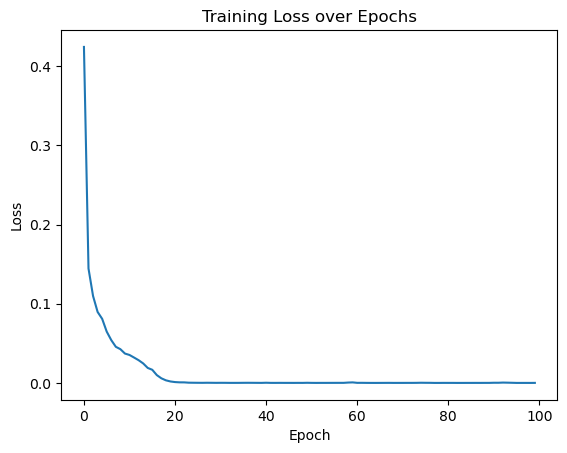

In [269]:
model = SineRNN(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0 # start loss value for each batch

    for inputs, targets in dataloader:
        optimizer.zero_grad() # clears the gradient
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        loss.backward() # applies backpropogation
        optimizer.step() # updates model parameters
        epoch_loss += loss.item() # calculates total loss
    epoch_loss /= len(dataloader) # average loss
    losses.append(epoch_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
plt.figure()
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

# Model Test

### This will be the test with the existing values

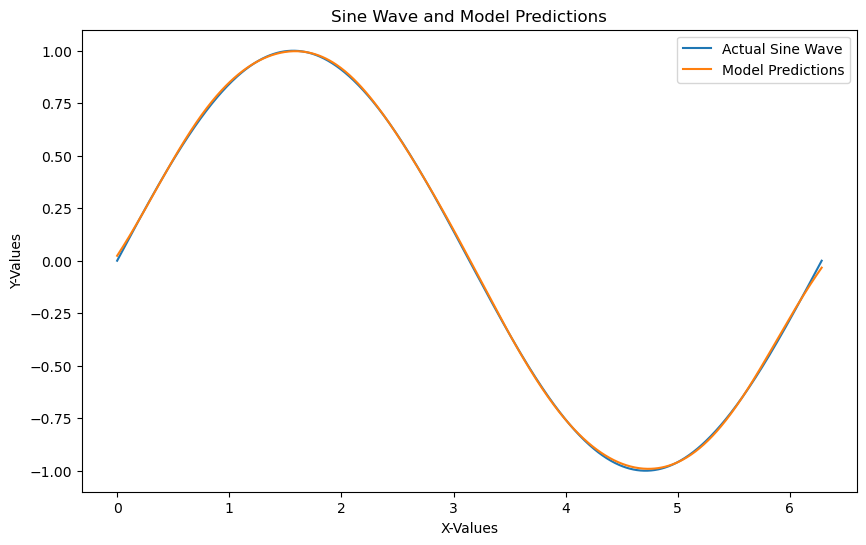

In [270]:
with torch.no_grad():
    model.eval()
    predictions = model(xTensor.unsqueeze(1)).squeeze()

plt.figure(figsize=(10, 6))
plt.plot(xValues, yValues, label='Actual Sine Wave')
plt.plot(xValues, predictions.numpy(), label='Model Predictions')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.title('Sine Wave and Model Predictions')
plt.legend()
plt.show()